# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


**1.** Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# formatação da tabela
ana_biv_1 = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
ana_biv_1.columns = ['saudáveis', 'doentes', 'Total']
ana_biv_1.index = ['female', 'male', 'Total']
print('Quantidade média de doentes:', (ana_biv_1.loc['male', 'doentes'] + ana_biv_1.loc['female', 'doentes']) / 2)

# analises
ana_biv_1['media_doentes_por_sexo'] = ana_biv_1['doentes']/ana_biv_1['Total']
ana_biv_1['Odds'] = ana_biv_1['doentes']/ana_biv_1['saudáveis']
ana_biv_1['Odds ratio'] = ana_biv_1['Odds']/ana_biv_1.loc['male', 'Odds']
ana_biv_1['Log (Odds)'] = np.log(ana_biv_1['Odds'])
ana_biv_1['Log (Odds ratio)'] = np.log(ana_biv_1['Odds ratio'])
ana_biv_1

Quantidade média de doentes: 69.5


,saudáveis,doentes,Total,media_doentes_por_sexo,Odds,Odds ratio,Log (Odds),Log (Odds ratio)
female,72,25,97,0.257732,0.347222,0.280214,-1.057790,-1.272200
male,92,114,206,0.553398,1.239130,1.000000,0.214410,0.000000
Total,164,139,303,0.458746,0.847561,0.683997,-0.165392,-0.379802


**2.** Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [5]:
df['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [6]:
df['age_grupo'] = pd.qcut(df['age'], q=5)
df['age_grupo'].value_counts()

(53.0, 58.0]      71
(45.0, 53.0]      64
(28.999, 45.0]    63
(62.0, 77.0]      60
(58.0, 62.0]      45
Name: age_grupo, dtype: int64

In [7]:
# formatação da tabela
ana_biv_2 = pd.crosstab(df['age_grupo'], df['flag_doente'], margins=True, margins_name='Total')
ana_biv_2.columns = ['saudáveis', 'doentes', 'Total']
print('Quantidade média de "age":', df['age'].mean())

# analises
ana_biv_2['media_doentes_por_idade'] = ana_biv_2['doentes']/ana_biv_2['Total']
ana_biv_2['Odds'] = ana_biv_2['doentes']/ana_biv_2['saudáveis']
ana_biv_2['Odds ratio (younger)'] = ana_biv_2['Odds']/ana_biv_2.loc[ana_biv_2.index[0], 'Odds']
ana_biv_2['Log (Odds)'] = np.log(ana_biv_2['Odds'])
ana_biv_2['Log (Odds ratio)'] = np.log(ana_biv_2['Odds ratio (younger)'])
ana_biv_2

Quantidade média de "age": 54.43894389438944


,saudáveis,doentes,Total,media_doentes_por_idade,Odds,Odds ratio (younger),Log (Odds),Log (Odds ratio)
age_grupo,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,1.000000,-1.077559,0.000000
"(45.0, 53.0]",42,22,64,0.343750,0.523810,1.538690,-0.646627,0.430932
"(53.0, 58.0]",32,39,71,0.549296,1.218750,3.580078,0.197826,1.275385
"(58.0, 62.0]",13,32,45,0.711111,2.461538,7.230769,0.900787,1.978345
"(62.0, 77.0]",30,30,60,0.500000,1.000000,2.937500,0.000000,1.077559
Total,164,139,303,0.458746,0.847561,2.489710,-0.165392,0.912166


**3.** Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

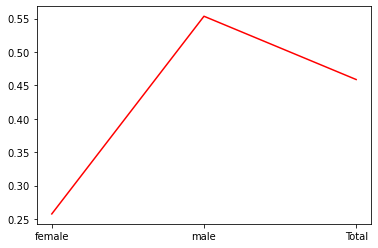

In [9]:
ana_biv_1.index = ana_biv_1.index.astype(str)
plt.plot(ana_biv_1['media_doentes_por_sexo'],  'r');

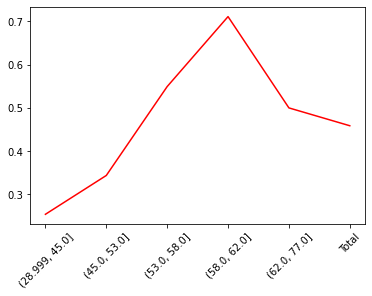

In [13]:
ana_biv_2.index = ana_biv_2.index.astype(str)
plt.plot(ana_biv_2['media_doentes_por_idade'],  'r')
plt.xticks(rotation=45);